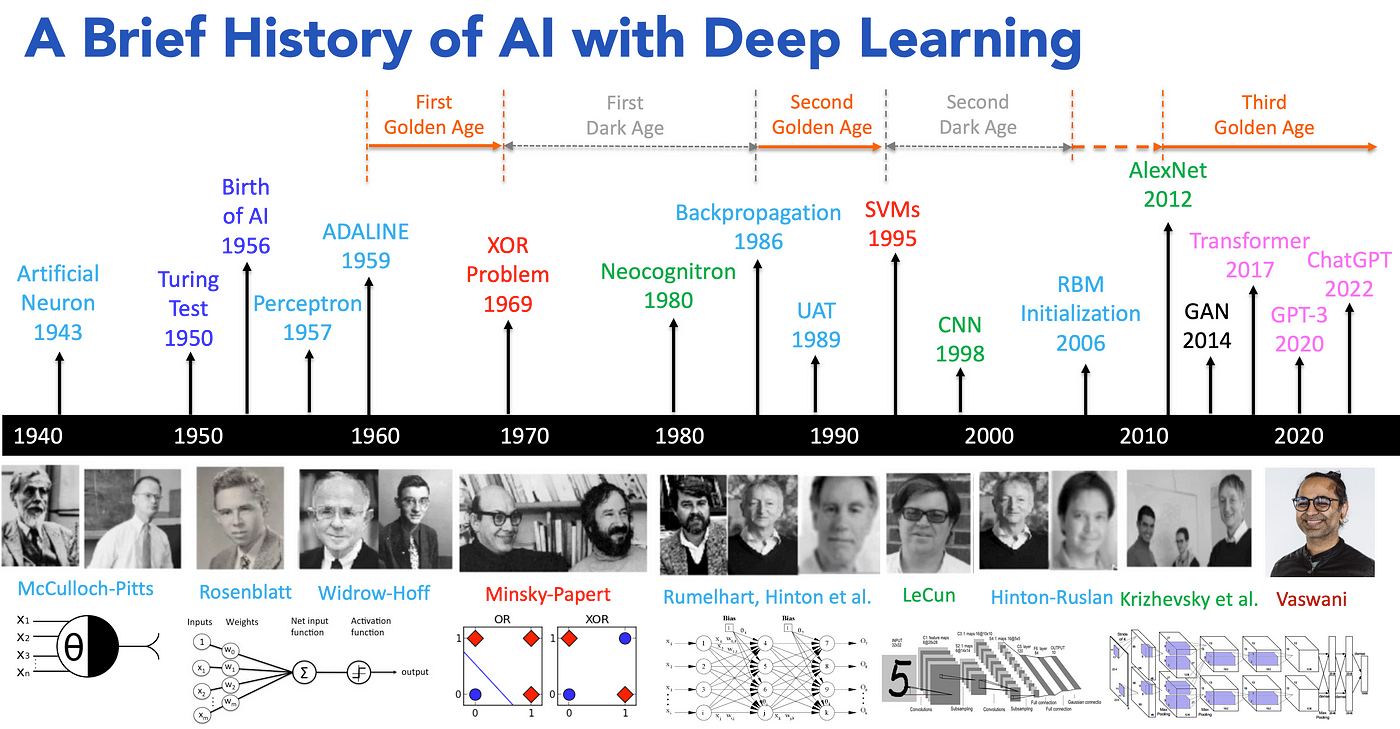

# **LeNet**

* The model was introduced by (and named for) Yann LeCun, then a researcher at AT&T Bell Labs, for the purpose of recognizing handwritten digits in images (LeCun et al., 1998).

* LeNet was eventually adapted to recognize digits for processing deposits in ATM machines.


**#Features of LeNet-5**
* Every convolutional layer includes three parts: convolution, pooling, and nonlinear activation functions
* Using convolution to extract spatial features (Convolution was called receptive fields originally)
* The average pooling layer is used for subsampling.
* ‘tanh’ is used as the activation function
* Using Multi-Layered Perceptron or Fully Connected Layers as the last classifier
* The sparse connection between layers reduces the complexity of computation

LeNet-5_architecture.svg

https://medium.com/@siddheshb008/lenet-5-architecture-explained-3b559cb2d52b

# **AlexNet**

* AlexNet, which employed an 8-layer CNN, won the ImageNet Large Scale Visual Recognition Challenge 2012 by a large margin (Russakovsky et al., 2013).

* This network showed, for the first time, that the features obtained by learning can transcend manually-designed features, breaking the previous paradigm in computer vision.

**The architectures of AlexNet and LeNet are strikingly similar.**

* There are also significant differences between AlexNet and LeNet.

* AlexNet is much deeper than the comparatively small LeNet-5.

* AlexNet consists of eight layers: five convolutional layers, two fully connected hidden layers, and one fully connected output layer.

* AlexNet used the ReLU instead of the sigmoid as its activation function.



alexnet.svg

From LeNet (left) to AlexNet (right).

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def AlexNet(input_shape=(224, 224, 3), num_classes=1000):
    model = models.Sequential([
        # Conv1
        layers.Conv2D(96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=3, strides=2),

        # Conv2
        layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        # Conv3
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),

        # Conv4
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),

        # Conv5
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Flatten(),

        # FC1
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # FC2
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # Output
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
model = AlexNet(num_classes=4)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │          16,388 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,763,396 (178.39 MB)

 Trainable params: 46,763,396 (178.39 MB)

 Non-trainable params: 0 (0.00 B)

# **Networks Using Blocks (VGG)**

* The idea of using blocks first emerged from the Visual Geometry Group (VGG) at Oxford University, in their eponymously-named VGG network (Simonyan and Zisserman, 2014).

* It is easy to implement these repeated structures in code with any modern deep learning framework by using loops and subroutines.


**Why Use Blocks in Neural Networks?**
* Modularity & Reusability
* Deeper Networks, Better Representations
* Easier to Analyze, Debug, and Improve

vgg.svg

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def vgg_block(num_convs, out_channels):
    block = models.Sequential()
    for _ in range(num_convs):
        block.add(layers.Conv2D(out_channels, kernel_size=3, padding='same', activation='relu'))
    block.add(layers.MaxPooling2D(pool_size=2, strides=2))
    return block


In [ ]:
def VGG(conv_arch, fc_units=4096, num_classes=1000):
    model = models.Sequential()

    # Convolutional Blocks
    input_shape = (224, 224, 3)
    model.add(layers.Input(shape=input_shape))
    for num_convs, out_channels in conv_arch:
        model.add(vgg_block(num_convs, out_channels))

    # Flatten + Fully Connected Layers (like AlexNet)
    model.add(layers.Flatten())
    model.add(layers.Dense(fc_units, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(fc_units, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


In [ ]:
conv_arch = [(1, 64), (1, 128), (2, 256), (3, 512), (3, 512)]
model = VGG(conv_arch=conv_arch,num_classes=4)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 112, 112, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 28, 28, 256)         │         885,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 14, 14, 512)         │       5,899,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 7, 7, 512)           │       7,079,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │          16,388 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,502,340 (509.27 MB)

 Trainable params: 133,502,340 (509.27 MB)

 Non-trainable params: 0 (0.00 B)

# **VGG 16 Implementation**

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, concatenate, Input, GlobalMaxPool2D, GlobalAvgPool2D

input_shape=Input((224,224,3))
modelvgg=Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(input_shape)
modelvgg=Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)

modelvgg=Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)

modelvgg=Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)

modelvgg=Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)

modelvgg=Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(modelvgg)
modelvgg=MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)


# Fully Connected Layers
modelvgg = Flatten()(modelvgg)
modelvgg = Dense(units = 4096, activation ='relu')(modelvgg)
modelvgg = Dense(units = 4096, activation ='relu')(modelvgg)
vggnet = Dense(units = 4, activation ='softmax')(modelvgg)


In [ ]:
#from tensorflow.keras.layers import Input, Conv2D
#from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense
from tensorflow.keras import Model

model = Model(inputs=input_shape, outputs=vggnet)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 134,276,932 (512.23 MB)

 Non-trainable params: 0 (0.00 B)

# **NiN based VGG16**

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, concatenate, Input, GlobalMaxPool2D, GlobalAvgPool2D
from keras.models import Model

def NiNBlock(x, num_filters):
    x = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(num_filters, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(num_filters, (1, 1), padding='same', activation='relu')(x)
    return x


In [ ]:
input_layer = Input((224, 224, 3))

x = Conv2D(64, (3,3), padding="same", activation="relu")(input_layer)
x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = NiNBlock(x, 256)  #3rd Block
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = NiNBlock(x, 512)  #4th Block
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

x = NiNBlock(x, 512)  #5th Block
x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)


x = GlobalAvgPool2D()(x)


output_layer = Dense(4, activation='softmax')(x)


In [ ]:
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 56, 56, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 56, 56, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 512)         │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 512)         │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 14, 14, 512)         │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 512)         │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,0

 Total params: 5,279,556 (20.14 MB)

 Trainable params: 5,279,556 (20.14 MB)

 Non-trainable params: 0 (0.00 B)